In [1]:
# Import Needed Packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Read In Image
image = mpimg.imread('lane_lines.jpg')

print("This Image Is: ", type(image), "With Dimensions: ", image.shape)

# Grab X And Y Size, Copy Image
y_size = image.shape[0]
x_size = image.shape[1]

region_select = np.copy(image)

This Image Is:  <class 'numpy.ndarray'> With Dimensions:  (540, 960, 3)


In [3]:
# Define Triangular ROI
# (Note: (0,0) Is Upper-Left)
left_bottom = [120, 539]
right_bottom = [800, 539]
apex = [470, 300]

In [4]:
# Fit Lines y=Ax+B To Identify 3-Sided ROI
# np.polyfit() Returns Coefficients [A,B] Of Fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [5]:
# Find Region Inside Lines
XX, YY = np.meshgrid(np.arange(0, x_size), np.arange(0, y_size))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color Px Inside ROI Red
region_select[region_thresholds] = [255,0,0]

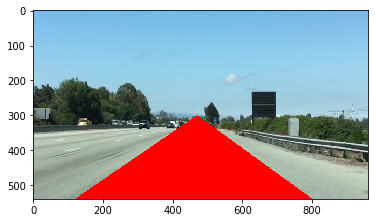

In [6]:
# Display Image
plt.imshow(region_select)